#### 該文件包含1,338個案例，即目前已經登記過的保險計劃受益者、病人特點和計劃計入的總醫療費用特徵:

* age:表示主要受益者年齡
* sex:性別
* bmi:身體質量指數,理想BMI在18.5~24.9之間
* children:表示保險計劃中所包括的孩子/受撫養者的數量
* smoker:表示被保險人是否經常吸煙
* region:受益者在美國的居住地-東北(northeast), 東南(sotheast), 西南(southwest)和東北(northwest)
* charges:醫療費用

#### 目的:檢測與醫療費用相關之變量，找出在醫療費用上具高風險的人

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('insurance.csv')

In [13]:
df.head()
#df.isnull().sum()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
###將欄位sex, children & region (categorical data) turn into numeric data using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df_encoded = df_encoded.astype(int)

In [15]:
#True / False 其實跟 1 / 0 運算一樣
df_encoded.columns
#df_encoded

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

## 標準化
* 當數據集中的不同特徵之間的尺度差異很大時，擬合的線性迴歸模型可能會受到影響，因為較大的特徵尺度可能會支配著較小的特徵尺度。
* 在這種情況下，標準化可以幫助線性迴歸模型更好地捕捉特徵之間的關係，提高模型的準確性和穩定性。
* 如果特徵之間的尺度差異較小，則標準化可能不是必要的。在這種情況下，可以直接使用原始數據進行線性迴歸建模。
* 在某些情況下，標準化可能會導致特徵之間的相關性變弱，因此需要根據具體的數據集和問題來決定是否需要進行標準化。

In [16]:
from sklearn import preprocessing
#建立MinMaxScaler物件
minmax = preprocessing.MinMaxScaler()
# 資料標準化
x_minmax = minmax.fit_transform(df_encoded[['age', 'bmi', 'children']])

In [17]:
x_minmax= pd.DataFrame(x_minmax, columns=['age', 'bmi', 'children'])

In [20]:
res_minmax = pd.concat([
    x_minmax.reset_index(drop=True),
    df_encoded[['sex_female', 'sex_male',
                'smoker_no', 'smoker_yes',
                'region_northeast', 'region_northwest',
                'region_southeast', 'region_southwest']].reset_index(drop=True)
], axis=1)
res_minmax

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.315789,0.0,1,0,0,1,0,0,0,1
1,0.000000,0.473684,0.2,0,1,1,0,0,0,1,0
2,0.217391,0.473684,0.6,0,1,1,0,0,0,1,0
3,0.326087,0.184211,0.0,0,1,1,0,0,1,0,0
4,0.304348,0.342105,0.0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.394737,0.6,0,1,1,0,0,1,0,0
1334,0.000000,0.421053,0.0,1,0,1,0,1,0,0,0
1335,0.000000,0.552632,0.0,1,0,1,0,0,0,1,0
1336,0.065217,0.263158,0.0,1,0,1,0,0,0,0,1


In [22]:
X = res_minmax.iloc[:, 0:11].values
y = df.iloc[:, 6].values.reshape(-1,1)

# 分割訓練和測試
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [23]:
print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of y_test{y_test.shape}")

Shape of X_train:(936, 11)
Shape of X_test:(402, 11)
Shape of y_train:(936, 1)
Shape of y_test(402, 1)


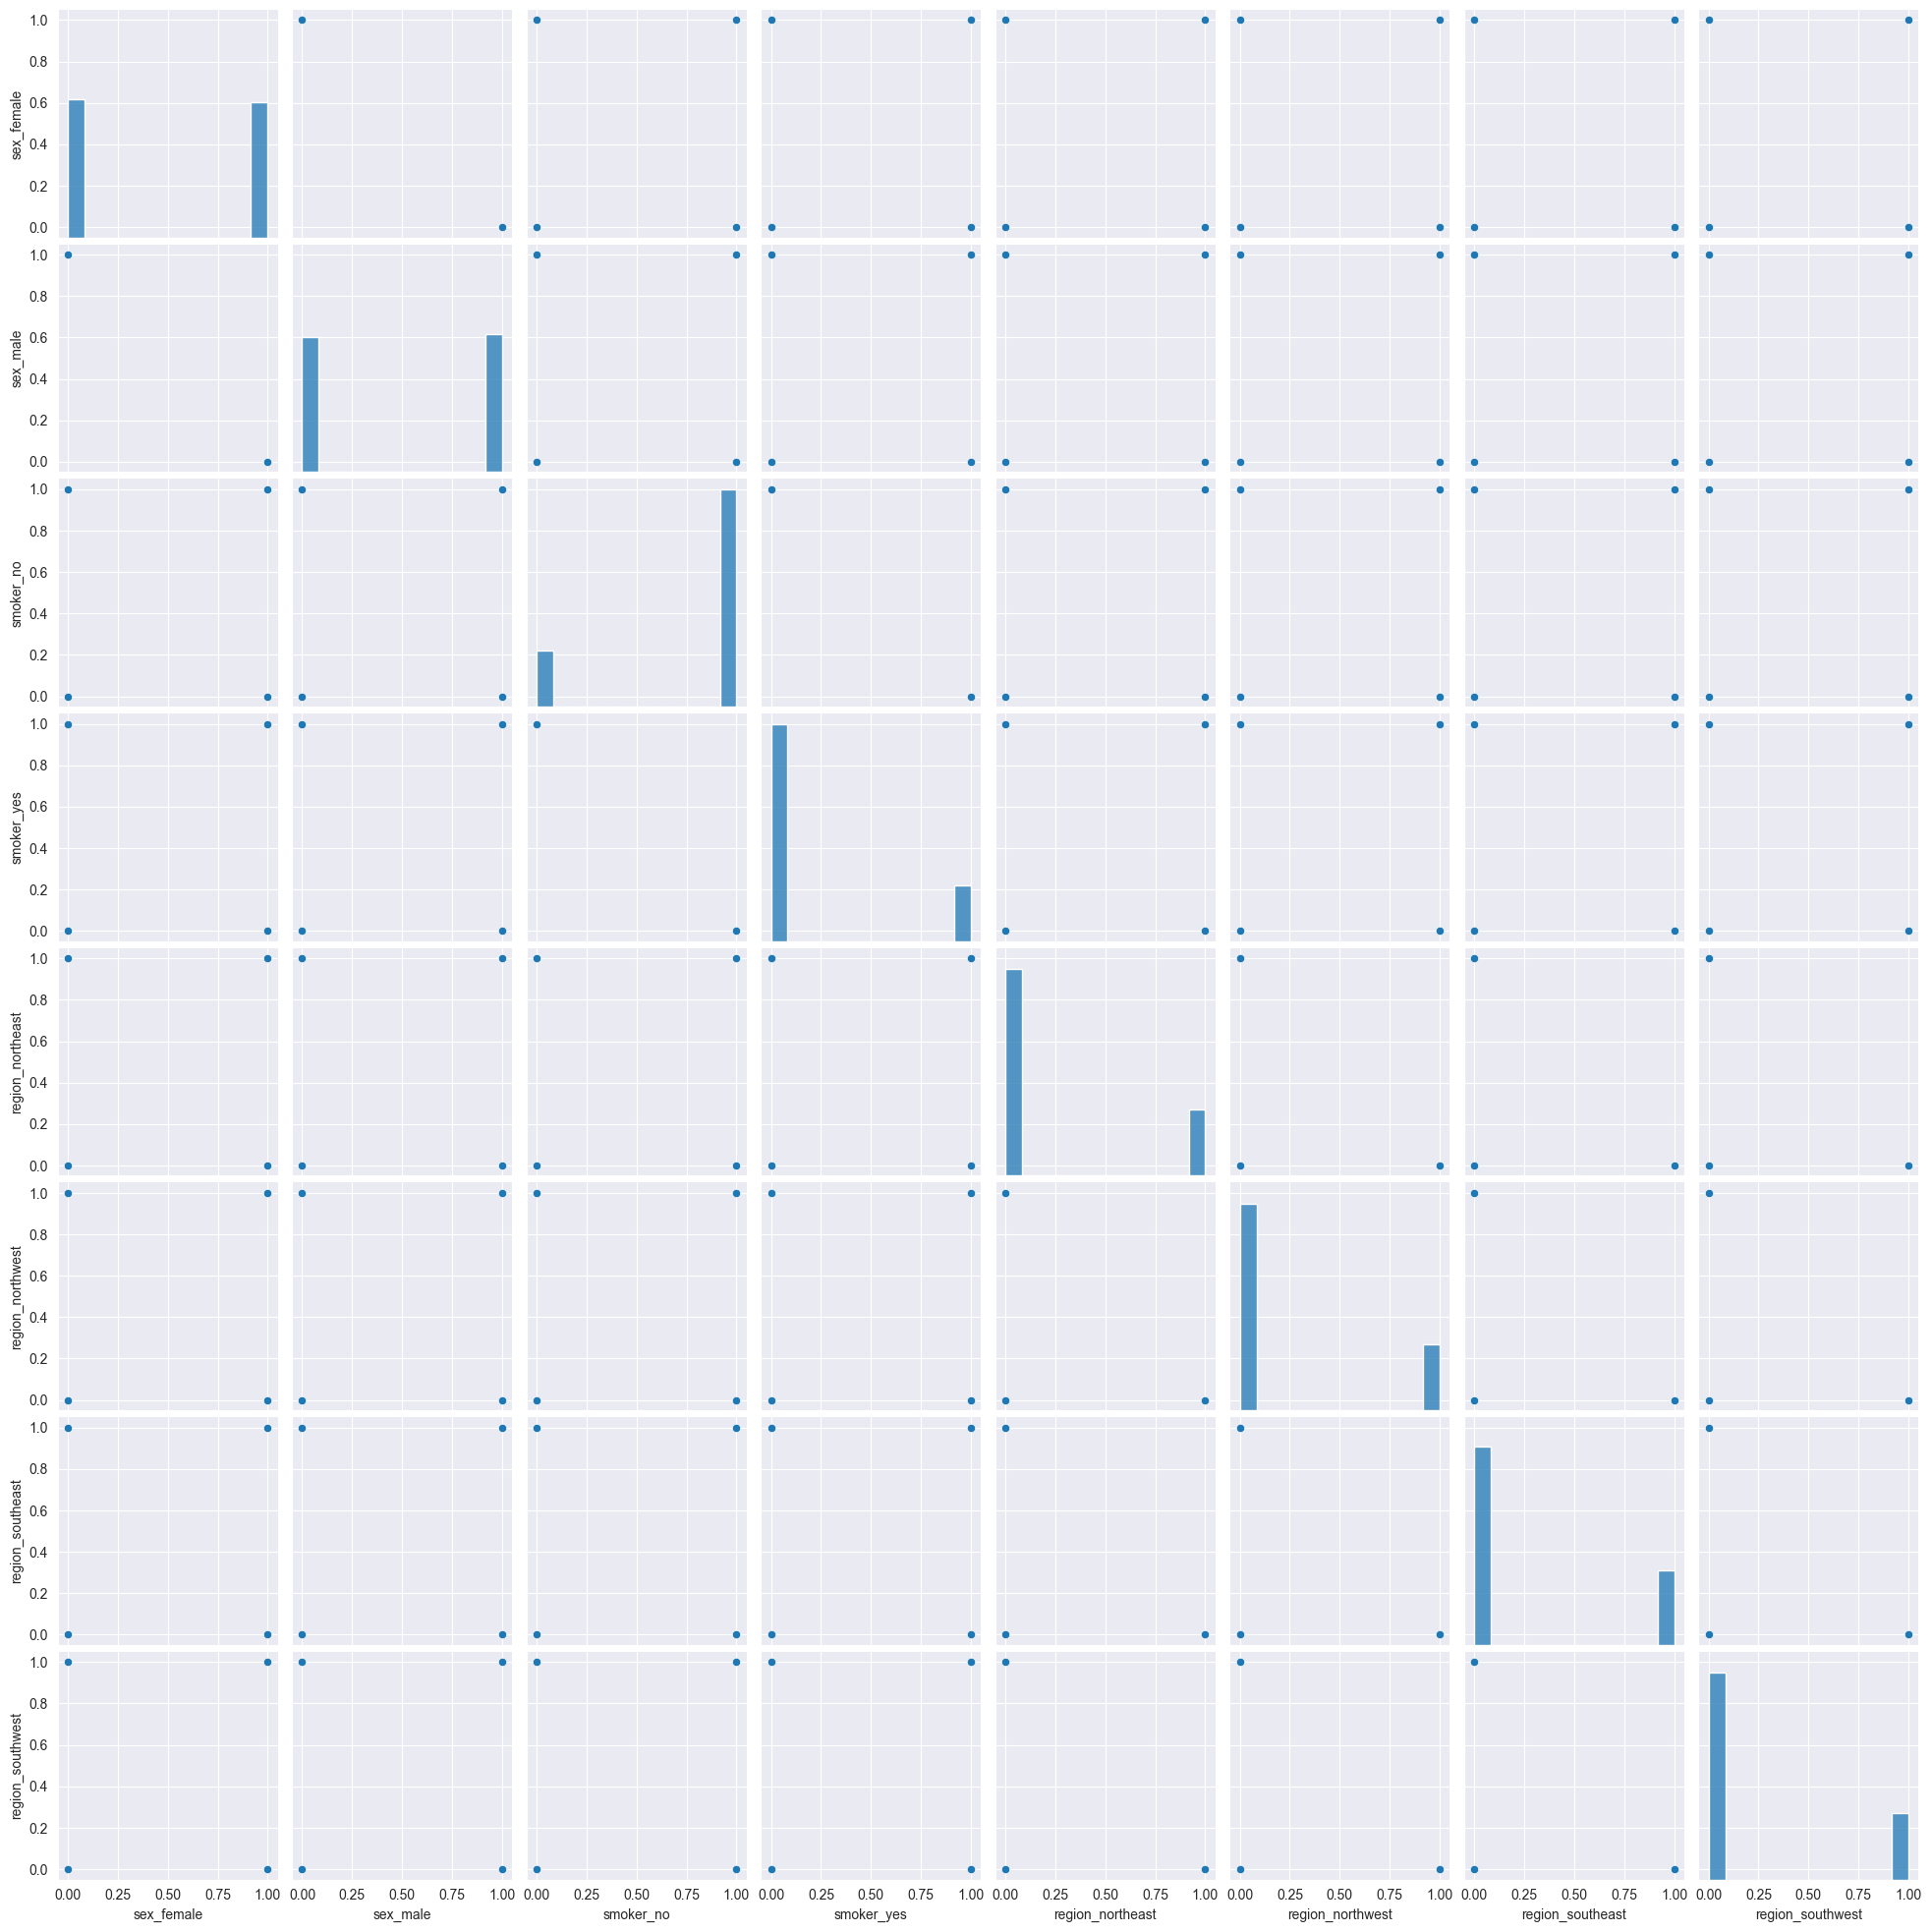

In [ ]:
df_final = pd.concat([])

sns.pairplot(res_minmax[['bmi','children','sex_female', 'sex_male',
                'smoker_no', 'smoker_yes',
                'region_northeast', 'region_northwest',
                'region_southeast', 'region_southwest']])

In [ ]:
# 4. Correlation
### <span style="color:#3498DB">Point1: 請觀察各變數之間的關係</span>
### <span style="color:#3498DB">Point2: 請判斷各變數之間是否有共線關係</span>

<Axes: >

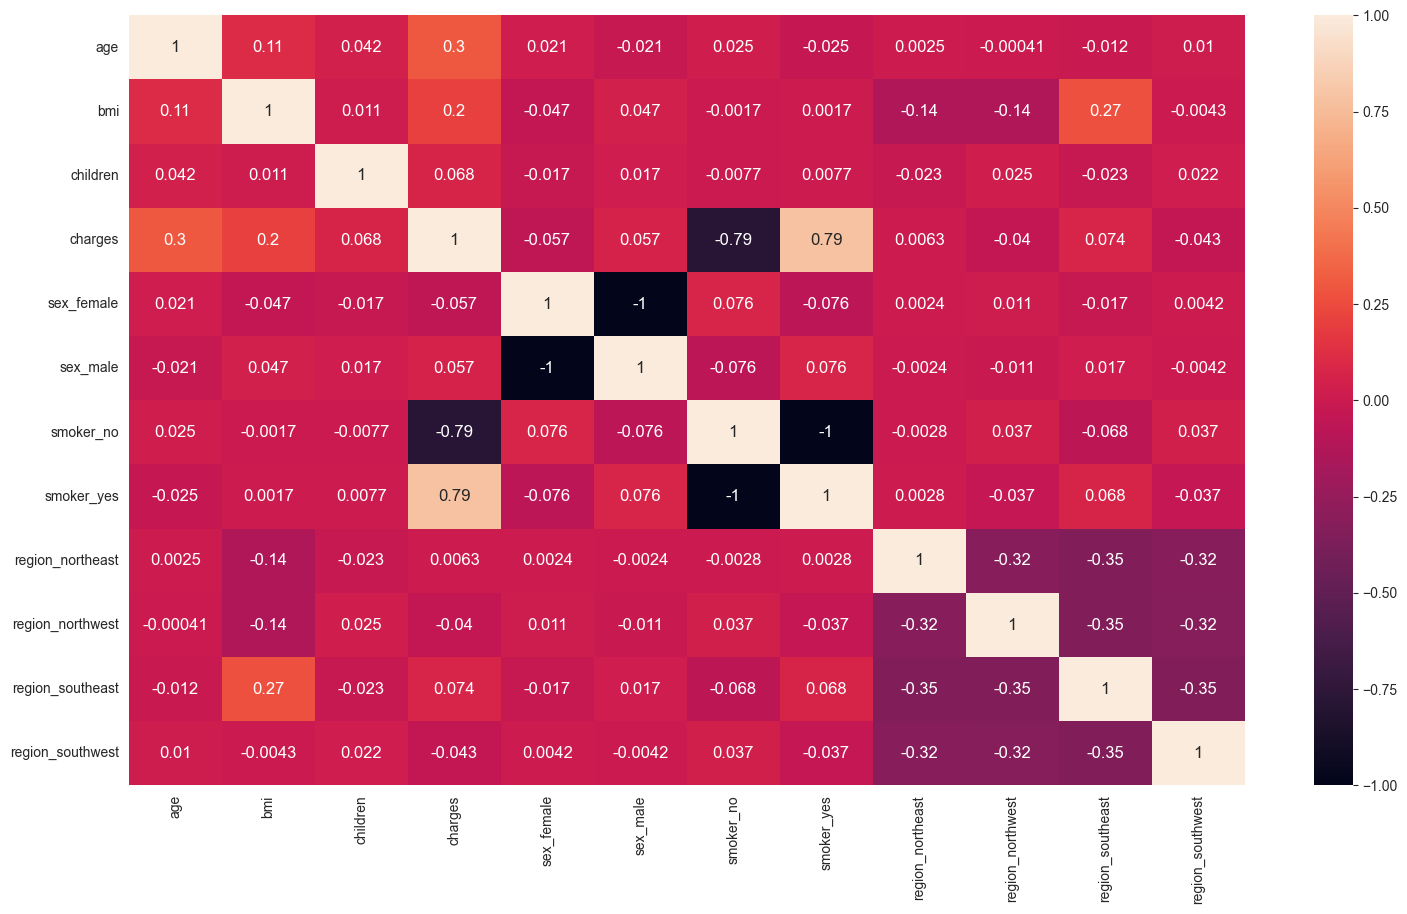

In [27]:
corrmat = df_encoded.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

In [28]:
## 5-1 Linear Regression (PPT 1.1 & 1.2)

In [29]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
from sklearn.metrics import r2_score

# R2 score，即決定係數，反映Y的全部變異能通過迴歸關係被所有X解釋的比例。
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE一般指均方根誤差(標準誤差)，可衡量預測值和實際值之間的平均差異，藉此估計預測模型預測目標值的準確度
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.7577700318926519
R2_score (test):  0.7303403374752262
RMSE:  5938.668183111739
RMSE:  6332.102971755825
